In [ ]:
from google.colab import files
uploaded = files.upload()
import io

Saving preprocessed_data.csv to preprocessed_data.csv


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import random
from sklearn import tree


from sklearn import linear_model
logr = linear_model.LogisticRegression(n_jobs =-1,solver = 'lbfgs', max_iter=500)

In [ ]:
df = pd.read_csv(io.StringIO(uploaded['preprocessed_data.csv'].decode('utf-8')))

df = df.iloc[1:]

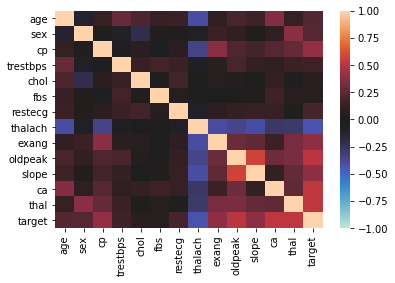

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), annot = False, vmin=-1, vmax=1, center= 0)

In [ ]:
# Split dataset

y = df['target']
X = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]

X_train = X[89:]
X_test = X[:89]
y_train = y[89:]
y_test = y[:89]

**Testing out a ton of models**

In [ ]:
random.seed(10)
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
y_true = y_test.values.tolist()

rec_svm = recall_score(y_true, y_pred, average='macro')


prec_svm = precision_score(y_true, y_pred, average='macro', zero_division = 0)
print ("The recall score of this model is: ", rec_svm)
print ("The precision score of this model is: ", prec_svm)
print ("The cross val score of this model is: ", cross_val_score(svm, X, y, cv = 10, scoring = 'accuracy').mean())


The recall score of this model is:  0.2
The precision score of this model is:  0.11235955056179776
The cross val score of this model is:  0.5372413793103449


In [ ]:

logr = LogisticRegression(solver='liblinear',multi_class='ovr')
logr.fit(X_train, y_train)

y_pred = logr.predict(X_test)
y_true = y_test.values.tolist()

rec_svm = recall_score(y_true, y_pred, average='macro')

prec_svm = precision_score(y_true, y_pred, average='macro', zero_division = 0)

print ("The recall score of this model is: ", rec_svm)
print ("The precision score of this model is: ", prec_svm)
print ("The cross val score of this model is: ", cross_val_score(logr, X, y, cv = 10, scoring = 'accuracy').mean())

The recall score of this model is:  0.3015555555555555
The precision score of this model is:  0.29515151515151516
The cross val score of this model is:  0.5777011494252874


In [ ]:
random.seed(10)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_true = y_test.values.tolist()

rec_rf = recall_score(y_true, y_pred, average='macro')

prec_rf = precision_score(y_true, y_pred, average='macro', zero_division = 0)

print ("The recall score of this model is: ", rec_rf)
print ("The precision score of this model is: ", prec_rf)
print ("The cross val score of this model is: ", cross_val_score(rf, X, y, cv = 10, scoring = 'accuracy').mean())

The recall score of this model is:  0.3388888888888889
The precision score of this model is:  0.36484848484848487
The cross val score of this model is:  0.5704597701149426


In [ ]:
from sklearn import tree
dec_tree = tree.DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

y_pred = dec_tree.predict(X_test)
y_true = y_test.values.tolist()

rec_dec_tree = recall_score(y_true, y_pred, average='macro')

prec_dec_tree = precision_score(y_true, y_pred, average='macro', zero_division = 0)

print ("The recall score of this model is: ", rec_dec_tree)
print ("The precision score of this model is: ", prec_dec_tree)
print ("The cross val score of this model is: ", cross_val_score(dec_tree, X, y, cv = 10, scoring = 'accuracy').mean())

The recall score of this model is:  0.26
The precision score of this model is:  0.25134615384615383
The cross val score of this model is:  0.43965517241379304


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

print (cross_val_score(lr, X, y, cv = 10, scoring = 'accuracy').mean())

0.5880459770114943


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.5730337078651685


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [ ]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.53333333 0.46666667 0.5        0.43333333 0.6        0.36666667
 0.55172414 0.55172414 0.48275862 0.62068966]


In [ ]:
print(scores.mean())

0.5106896551724137


In [ ]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores.mean())

NameError: ignored

Trying out k fold

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [ ]:

from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)
X = X.to_numpy()
y = y.to_numpy()
scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], \
                                       y[train_index], y[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [ ]:

scores_logistic

[0.6060606060606061, 0.5454545454545454, 0.6122448979591837]

In [ ]:
scores_svm

[0.5353535353535354, 0.5353535353535354, 0.5408163265306123]

In [ ]:
scores_rf

[0.5959595959595959, 0.5555555555555556, 0.5714285714285714]

Text(0, 0.5, 'Cross-Validated Accuracy')

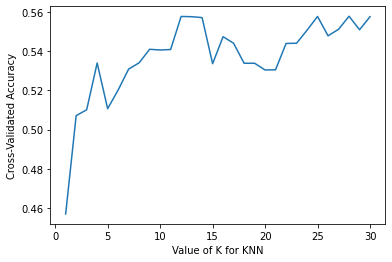

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.5304597701149425


In [ ]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.5880459770114943


In [ ]:
# Precision Score
from sklearn.metrics import precision_score

prec_logr = precision_score(y_true, y_pred, average='macro')
print("The precision score of this model is: ", prec_logr)

The precision score of this model is:  0.29515151515151516


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Input data to predict

age = input("Enter your age: ")
sex = input("Enter your sex: ")
cp = input("Enter your cp: ")
trestbps = input("Enter your trestbps: ")
chol = input("Enter your chol: ")
fbs = input("Enter your fbs: ")
restecg = input("Enter your restecg: ")
thalach = input("Enter your thalach: ")
exang = input("Enter your exang: ")
oldpeak  = float(input("Enter your oldpeak: "))
slope  = input("Enter your slope: ")
ca  = input("Enter your ca: ")
thal  = input("Enter your thal: ")

logr.fit(X,y)
const = [age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]
const = np.array(const, dtype=np.float64)
target = logr.predict([const])
# target = logr.predict([[63,1,1,145,233,1,2,150,0,2.3,3,0,6]])
print(target)

Enter your age: 67
Enter your sex: 1
Enter your cp: 4
Enter your trestbps: 160
Enter your chol: 286
Enter your fbs: 0
Enter your restecg: 2
Enter your thalach: 106
Enter your exang: 1
Enter your oldpeak: 1.5
Enter your slope: 2
Enter your ca: 3
Enter your thal: 2
[3]


Trying to improve on accuracy


In [ ]:
from sklearn import tree
dec_tree = tree.DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
dec_tree.score(X_test, y_test)

0.5280898876404494

In [ ]:
df = pd.read_csv(io.StringIO(uploaded['preprocessed_data.csv'].decode('utf-8')))

df = df.iloc[1:]

In [ ]:
logModel = LogisticRegression()

In [ ]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4,4,20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [1000,2500, 5000]
    }
]

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 1, verbose=True, n_jobs=-1)

In [ ]:
best_clf = clf.fit(X_train,y_train)
best_clf.best_estimator_
print (f'Accuracy - : {best_clf.score(X,y):.3f}')

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 195 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 595 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1416 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2512 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3696 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 5074 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 6468 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 8086 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 9892 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 11906 tasks      | elapsed: 43.5min
[Parallel(n_jobs=-1)]: Done 12000 out of 12000 | elapsed: 44.1min finished

Accuracy - : 0.625


In [ ]:
best_clf.best_estimator_

LogisticRegression(C=0.012742749857031334, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print (f'Accuracy - : {best_clf.score(X,y):.3f}')

NameError: ignored